# Sentiment Analysis

A corpus' sentiment is the average of these.
   * **Polarity**: -1 is very negative. +1 is very positive.
   * **Subjectivity**: 0 is fact. +1 is opinion.


In [9]:
import pandas as pd
import numpy as np
import math

import seaborn as sns

import matplotlib.pyplot as plt
%matplotlib inline

from textblob import TextBlob

import warnings
warnings.filterwarnings('ignore')

In [4]:
data=pd.read_csv("frame2.csv")

In [5]:
pol = lambda x: TextBlob(x).sentiment.polarity
sub = lambda x: TextBlob(x).sentiment.subjectivity

data['polarity'] = data['Transcript'].apply(pol)
data['subjectivity'] = data['Transcript'].apply(sub)
data

,S No.,Tag,URL,Raw Transcript,Names,Title,Year,Transcript,runtime,rating,language,rating_type,words,word_count,f_words,s_words,diversity,diversity_ratio,polarity,subjectivity
0,0,\t\t\t\tTom Segura: Sledgehammer (2023) | Tr...,https://scrapsfromtheloft.com/comedy/tom-segur...,"['[clacking]', '[soft bamboo flute notes play]...",\t\t\t\tTom Segura,\t\t\t\tTom Segura: Sledgehammer,2023,hey hey you tell me how have you been ...,61.0,7.1,en,0,"['hey', 'hey', 'tell', 'wanna', 'sledgehammer'...",3388,40,11,1107,0.326741,0.062307,0.497461
1,1,\t\t\t\tEddie Izzard: Force Majeure Live (20...,https://scrapsfromtheloft.com/comedy/eddie-izz...,['London. Otherwise it would be a little bit t...,\t\t\t\tEddie Izzard,\t\t\t\tEddie Izzard: Force Majeure Live,2013,london otherwise it would be a little bit tric...,85.0,7.3,en,1,"['london', 'otherwise', 'would', 'little', 'bi...",5796,22,5,1843,0.317978,0.065432,0.473526
2,2,\t\t\t\tMarlon Wayans: You Know What It Is (...,https://scrapsfromtheloft.com/comedy/marlon-wa...,"['[Hip-hop music playing]', '♪♪', '[Cheers and...",\t\t\t\tMarlon Wayans,\t\t\t\tMarlon Wayans: You Know What It Is,2021,miami make some noise for mr marlon wayans...,58.0,4.0,en,0,"['miami', 'make', 'noise', 'mr', 'marlon', 'wa...",4867,112,86,1319,0.271009,-0.056571,0.556618
3,3,\t\t\t\tKyle Kinane: Whiskey Icarus (2012) |...,https://scrapsfromtheloft.com/comedy/kyle-kina...,"['Whoo!', 'I’m Kyle Kinane. Kyle Christian Kin...",\t\t\t\tKyle Kinane,\t\t\t\tKyle Kinane: Whiskey Icarus,2012,whoo im kyle kinane kyle christian kinane yeah...,60.0,7.9,en,1,"['whoo', 'im', 'kyle', 'kinane', 'kyle', 'chri...",5110,12,11,1743,0.341096,0.098343,0.513497
4,4,\t\t\t\tKyle Kinane: Loose in Chicago (2016)...,https://scrapsfromtheloft.com/comedy/kyle-kina...,"['[indistinct chatter]', 'Ladies and gentlemen...",\t\t\t\tKyle Kinane,\t\t\t\tKyle Kinane: Loose in Chicago,2016,ladies and gentlemen kyle kinane well thank...,77.0,7.1,en,0,"['ladies', 'gentlemen', 'kyle', 'kinane', 'wel...",3089,6,8,1113,0.360311,0.102820,0.513013
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
400,421,\t\t\t\tLOUIS C.K.: 2017 – Full transcript\t...,https://scrapsfromtheloft.com/comedy/louis-c-k...,['Louis C.K Netflix special filmed in Washingt...,\t\t\t\tLOUIS C.K.,\t\t\t\tLOUIS C.K.: 2017,2017,louis ck netflix special filmed in washington ...,NaN,NaN,en,0,"['louis', 'ck', 'netflix', 'special', 'filmed'...",4063,73,46,1168,0.287472,0.036782,0.542504
401,422,\t\t\t\tGeorge Carlin: Jamming in New York (...,https://scrapsfromtheloft.com/comedy/george-ca...,['Jammin’ in New York is George Carlin’s 14th ...,\t\t\t\tGeorge Carlin,\t\t\t\tGeorge Carlin: Jamming in New York,1992,jammin in new york is george carlins album an...,NaN,NaN,en,0,"['jammin', 'new', 'york', 'george', 'carlins',...",4334,52,25,1609,0.371251,0.031729,0.525063
402,424,\t\t\t\tReggie Watts: Spatial (2016) – Full ...,https://scrapsfromtheloft.com/comedy/reggie-wa...,"['Hello, I’m Thomas. I’m so glad to meet you M...",\t\t\t\tReggie Watts,\t\t\t\tReggie Watts: Spatial,2016,hello im thomas im so glad to meet you mum im...,NaN,NaN,en,0,"['hello', 'im', 'thomas', 'im', 'glad', 'meet'...",2246,33,7,875,0.389581,0.104515,0.569039
403,425,\t\t\t\tGEORGE CARLIN: COMPLAINTS AND GRIEVA...,https://scrapsfromtheloft.com/comedy/george-ca...,['Complaints and Grievances is a HBO stand-up ...,\t\t\t\tGEORGE CARLIN,\t\t\t\tGEORGE CARLIN: COMPLAINTS AND GRIEVA...,2001,complaints and grievances is a hbo standup spe...,NaN,NaN,en,0,"['complaints', 'grievances', 'hbo', 'standup',...",4299,60,33,1680,0.390789,0.025769,0.506590


In [21]:
data['Names'] = data['Names'].str.replace('\t', '')

In [22]:
data = data[:10]

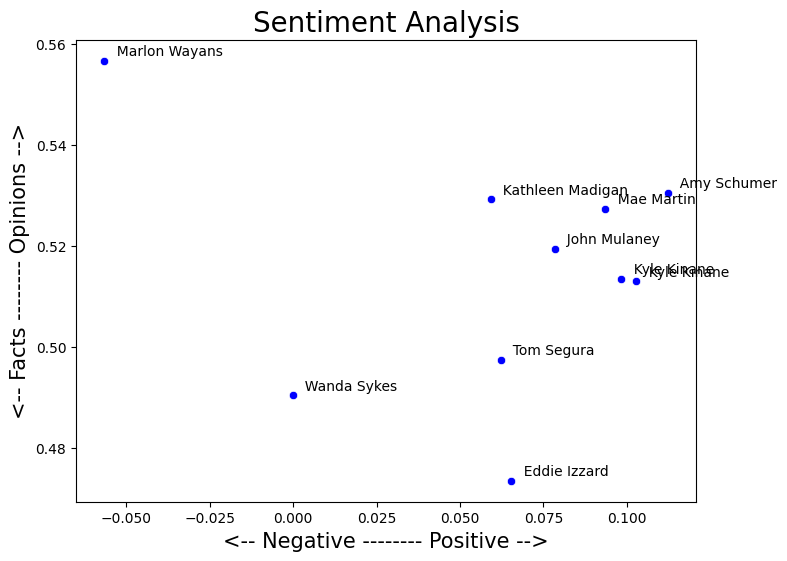

In [23]:
plt.rcParams['figure.figsize'] = [8, 6]

# Scatter plot using Seaborn
sns.scatterplot(x='polarity', y='subjectivity', data=data, color='blue')

# Annotate points with comedian names
for index, comedian in enumerate(data.index):
    x = data['polarity'].loc[comedian]
    y = data['subjectivity'].loc[comedian]
    plt.text(x + 0.001, y + 0.001, data['Names'][index], fontsize=10)

# Set title and axis labels
plt.title('Sentiment Analysis', fontsize=20)
plt.xlabel('<-- Negative -------- Positive -->', fontsize=15)
plt.ylabel('<-- Facts -------- Opinions -->', fontsize=15)

# Show the plot
plt.show()

## Sentiment of Routine Over Time

In [24]:
# Split each routine into 10 parts
def split_text(text, n=10):
    # Calculate length of text, the size of each chunk of text and the starting points of each chunk of text
    length = len(text)
    size = math.floor(length / n)
    start = np.arange(0, length, size)
    
    # Pull out equally sized pieces of text and put it into a list
    split_list = []
    for piece in range(n):
        split_list.append(text[start[piece]:start[piece]+size])
    return split_list

In [25]:
# a list to hold all of the pieces of text
list_pieces = []
for t in data.Transcript:
    split = split_text(t)
    list_pieces.append(split)
    
list_pieces

[['     hey hey you   tell me how have you been    i wanna be   your sledgehammer   why dont you call my name  thank you very much thank you everybody  thank you please take a seat  thank you so much thanks for coming out yeah man were here  yeah   well let me ask you guys something man are they gonna keep taking our confederate statues down or what   yeah  just taking the temperature of the room i dont know whos here you know   thats a weird one to start all right  yeah ive been on this uh phenomenal tour and ive uh ive met people i never thought i would meet in my life recently i met a supermodel which is wild because well i dont think she wanted to meet me i should be clear i was in a a fancy hotel in toronto and somebody that worked there they go to her hey hes a comedian and she was like okay  and then they go shes a supermodel i was like i can see  and what struck me is that they are so much betterlooking than you think theyre gonna be like you see in a magazine or on your phone 

In [26]:
# Calculate the polarity for each piece of text

polarity_transcript = []
for lp in list_pieces:
    polarity_piece = []
    for p in lp:
        polarity_piece.append(TextBlob(p).sentiment.polarity)
    polarity_transcript.append(polarity_piece)
    
polarity_transcript

[[0.0776328502415459,
  0.11248134988701027,
  0.09198209198209199,
  -0.02869734432234433,
  0.03460393772893774,
  0.13490443796566245,
  0.04037593984962406,
  0.12771919879062735,
  -0.03667388167388166,
  0.052922799422799406],
 [0.03656329035361294,
  0.14840532103829984,
  0.11286362661362657,
  0.015904581529581536,
  0.02971059276980331,
  0.11957402008422417,
  0.0039013191848243337,
  0.10815117379633518,
  0.11424489517574621,
  -0.052836067441330604],
 [-0.15442482864357854,
  -0.07041666666666668,
  0.011316322566322572,
  -0.05960524623890957,
  0.09435491676345337,
  0.0018206975772765224,
  -0.10763154027042918,
  -0.11852910052910053,
  -0.18188657407407413,
  0.05092592592592593],
 [0.0964173655292076,
  0.006745777370777356,
  0.0027687851600895026,
  0.10861079935154008,
  0.1406724168087804,
  0.1292279411764706,
  0.08503388476602763,
  0.1559048663324979,
  0.07708424616319352,
  0.16125160051216386],
 [0.17441819291819285,
  0.03685870181405897,
  0.12501293995

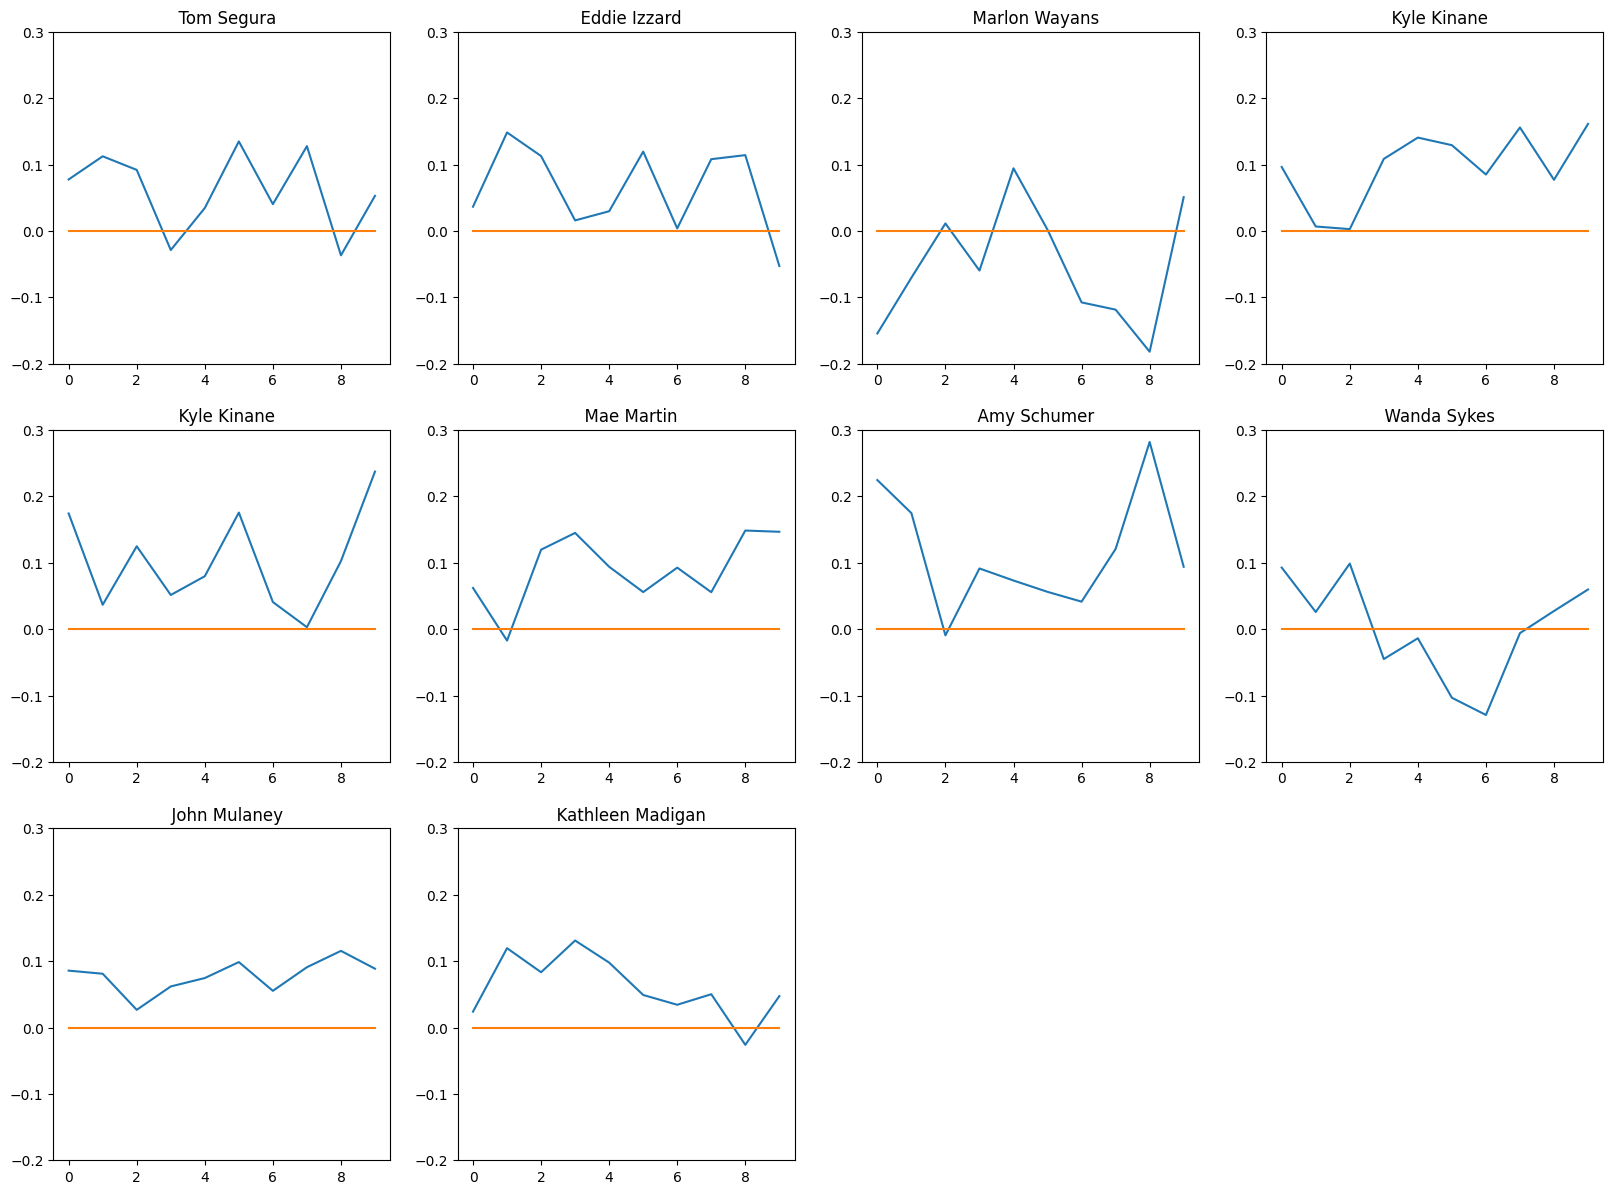

In [27]:
# plot for all selected comedians
plt.rcParams['figure.figsize'] = [20, 25]

for index, comedian in enumerate(data.index):    
    plt.subplot(5, 4, index+1)
    plt.plot(polarity_transcript[index])
    plt.plot(np.arange(0,10), np.zeros(10))
    plt.title(data['Names'][index])
    plt.ylim(ymin=-.2, ymax=.3)
    
plt.show()